In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Connect to the database using a Python client
connection = mysql.connector.connect(host='localhost', user='root', password='', database='little_lemon')
cursor = connection.cursor()

In [3]:
# 1. Execute a simple query
cursor.execute("select customer_id, name, phone from customers")
rows = cursor.fetchall()
for row in rows:
    print(row)  # e.g. (1, 'Alice', '123456789')

(1, 'Alice', '123456789')
(2, 'Bob', '987654321')
(3, 'Charlie', '555999123')
(4, 'Charlie', '555999123')
(5, 'Charlie', '555999123')
(6, 'Charlie', '555999123')


In [4]:
customer_name = 'Alice'
query = 'SELECT * FROM customers WHERE name = %s'
cursor.execute(query, (customer_name,))
alice_data = cursor.fetchall()
print("Alice data:", alice_data)

Alice data: [(1, 'Alice', '123456789', 'alice@example.com')]


In [5]:
# 2. Execute a query with a condition
customer_name = 'Alice'
query = 'select * from customers where name = %s'
cursor.execute(query, (customer_name,))
alice_data = cursor.fetchall()
print('Alice data:', alice_data)

Alice data: [(1, 'Alice', '123456789', 'alice@example.com')]


In [6]:
# 3. Insert a new customer
new_customer = ('Charlie', '555999123', 'charlie@example.com')
insert_sql = 'insert into customers (name, phone, email) values (%s, %s, %s)'
cursor.execute(insert_sql, new_customer)
connection.commit()
print('Inserted new customer with ID:', cursor.lastrowid)

Inserted new customer with ID: 7


In [7]:
# 4. Update a booking
update_sql = "update booking set status='completed' where booking_id = %s"
booking_id = 3
cursor.execute(update_sql, (booking_id,))
connection.commit()
print('Updated booking with ID:', booking_id)
print('Affected rows:', cursor.rowcount)

Updated booking with ID: 3
Affected rows: 0


   booking_id  customer_id booking_date    booking_time  table_number  \
0           1            1   2025-01-10 0 days 18:30:00             5   
1           2            2   2025-01-10 0 days 19:00:00             3   
2           3            1   2025-01-10 0 days 18:30:00             5   
3           4            1   2025-01-10 0 days 19:00:00             5   
4           6            1   2025-05-10 0 days 19:00:00             5   

      status  
0     active  
1     active  
2  completed  
3     active  
4     active  
table_number
3     1
5    11
dtype: int64


/var/folders/n_/df_7_pcd4n36zs9d514ntkdm0000gn/T/ipykernel_3524/1653117789.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_bookings = pd.read_sql("SELECT * FROM booking", con=connection)


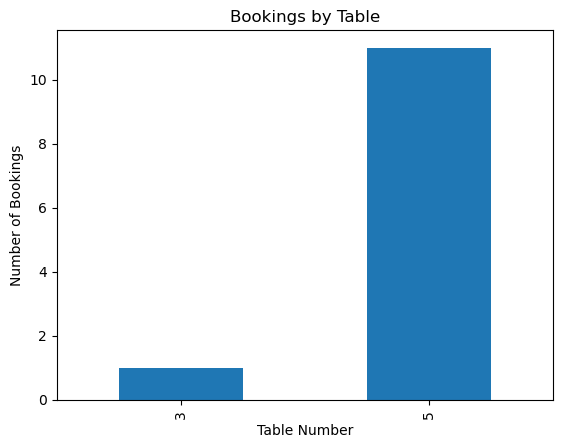

In [8]:
# 5. Use pandas to analyze data
df_bookings = pd.read_sql("SELECT * FROM booking", con=connection)
print(df_bookings.head())

# 5.1. Get the number of bookings by table
table_count = df_bookings.groupby('table_number').size()
print(table_count)

# 5.2. Plot the number of bookings by table
table_count.plot(kind='bar')
plt.xlabel('Table Number')
plt.ylabel('Number of Bookings')
plt.title('Bookings by Table')
plt.show()

In [9]:
# 6. Call a stored procedure
cursor.callproc('addbooking', [1, '2025-05-10', '19:00:00', 5])
connection.commit()
for result in cursor.stored_results():
    data = result.fetchall()
    print("Stored procedure output:", data)

Stored procedure output: [(14,)]


In [10]:
cursor.close()
connection.close()